In [2]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import plot_model, vis_utils
from IPython.display import SVG
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

Using TensorFlow backend.
/home/leem/anaconda3/envs/eenlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/leem/anaconda3/envs/eenlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Load data
imdb = keras.datasets.imdb

In [4]:
VOCAB_SIZE = 10000
INDEX_FROM = 2
# Get data with words replaced with an index, ensuring 0,1,2 are reserved for special tokens
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,
index_from=INDEX_FROM)
print('Sample review:', train_data[0])
print('\n Sample label:', test_labels[1])

Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]

 Sample label: 1


## Part C Q1: Readying the inputs for the LSTM Sanity Check

In [5]:
MAXIMUM_LENGTH = 500
print('Length of sample train_data before preprocessing:', len(train_data[0]))

# Pad the sequences to 500
preprocessed_train_data = pad_sequences(train_data, MAXIMUM_LENGTH)
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))
unpreprocessed_train_data = train_data
train_data = preprocessed_train_data

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


## Part C Q2:

In [6]:
# Create LSTM based model
EMBED_SIZE = 100
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


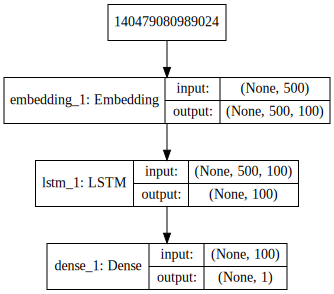

In [7]:
# Visualise the model another way
SVG(vis_utils.model_to_dot(
model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [6]:
# Stratified count done to avoid class imbalance. 2000 val instances
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=2000, stratify=train_labels)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, train_data.shape)

(23000, 500) (23000,) (2000, 500) (2000,) (25000, 500)


In [13]:
# Train the model and record the training and validation accuracies. 
history = model.fit(x_train,y_train,epochs=3,batch_size=128,validation_data=(x_val, y_val),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 107s 5ms/step - loss: 0.4505 - acc: 0.7767 - val_loss: 0.3018 - val_acc: 0.8750
Epoch 2/3
23000/23000 [==============================] - 103s 4ms/step - loss: 0.2658 - acc: 0.8962 - val_loss: 0.2953 - val_acc: 0.8710
Epoch 3/3
23000/23000 [==============================] - 104s 5ms/step - loss: 0.1947 - acc: 0.9305 - val_loss: 0.3280 - val_acc: 0.8725


## Part C Q3:
Answering the question about epoch number: The graph actually shows validation accuracy increasing from epoch 1 to epoch 2 so we should probably do more epochs of training to check the accuracy doesn't improve.. Although it looks like it's unlikely to benefit from more than a small number more as the rate of validation accuracy change is quite small. We might find the best result is from the first epoch. We can see that overfitting is beginning to happen. It's interesting to note that the validation accuracy actualyl starts higher than the training accuracy. 

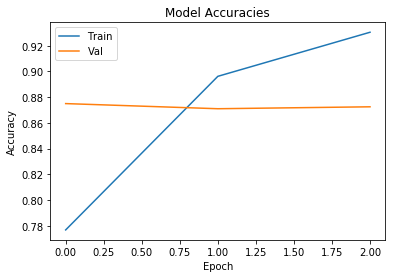

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()


In [7]:
# Prep test data and then evaluate model
test_data = pad_sequences(test_data, MAXIMUM_LENGTH)

In [15]:
results = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 142s 6ms/step


## Part C Q4:

In [16]:
print('test_loss:', results[0], 'test_accuracy:', results[1])

test_loss: 0.34782473476409914 test_accuracy: 0.86804


## Part C Q5:

In [18]:
print(model.summary())
# Get the word embeddings and show their shape
word_embeddings = model.get_layer('embedding_1').get_weights()[0]
print('Shape of word_embeddings:', word_embeddings.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None
Shape of word_embeddings: (10000, 100)


In [19]:
# Get mapping from word to id and add in our special tokens
word2idx = imdb.get_word_index()
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

In [21]:
# Create mapping from id to word
idx2word = {}
for key in word2idx.keys():
    idx2word[word2idx[key]] = key

## Part C Q6:

In [22]:
print(' '.join(idx2word[idx] for idx in train_data[0]))
print(train_data[0])

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

## Part C Q7:

In [24]:
print(pd.DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2         3         4         5   \
woods      0.031733  0.052810  0.022423  0.020563 -0.009287  0.051908   
hanging   -0.065999  0.001062 -0.002010 -0.012520  0.036425 -0.050581   
woody      0.018542 -0.025846 -0.030020  0.014743 -0.031633 -0.047324   
arranged   0.021409 -0.020560 -0.023877  0.053893 -0.031001  0.050169   
bringing   0.000111  0.027551  0.031595 -0.034385 -0.003527 -0.033018   
wooden    -0.034131 -0.009226 -0.011106 -0.044607  0.031029  0.000851   
errors     0.036070  0.011455  0.020230 -0.018764 -0.036538  0.040348   
dialogs    0.029443 -0.026471  0.006980 -0.005210  0.004309  0.026462   
kids       0.033318  0.001844 -0.033535  0.034999  0.052360 -0.006552   
uplifting -0.046354 -0.020135 -0.010315  0.012853  0.057712 -0.040974   

                 6         7         8         9     ...           90  \
woods      0.025586 -0.042875 -0.034092  0.063324    ...     0.054057   
hanging   -0.013366 -0.006267  0.009851 -0.007827 

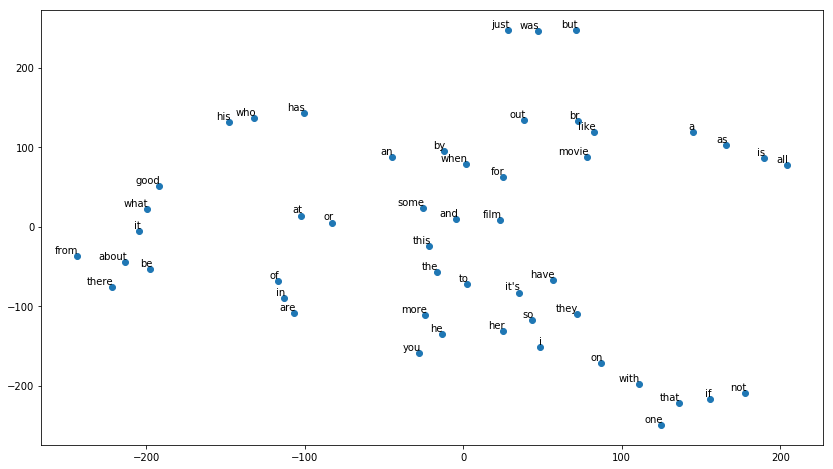

In [82]:
# Prepping the tsne object for dimensionality reduction
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
start = 3
plot_only = 54

# Plotting first 54 words onto 2 dimensions by reducing dimensionality
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points',ha='right',va='bottom')

## Part C Q8:
Create a new model that is a copy of the model step 3. To this new model, add two dropout
layers, one between the embedding layer and the LSTM layer and another between the
LSTM layer and the output layer. Repeat steps 4 and 5 for this model. What do you observe?
How about if you train this new model for 6 epochs instead?

In [8]:
# Create LSTM based model
EMBED_SIZE = 100
model2 = Sequential()
model2.add(Embedding(VOCAB_SIZE, EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model2.add(Dropout(0.2))
model2.add(LSTM(100))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


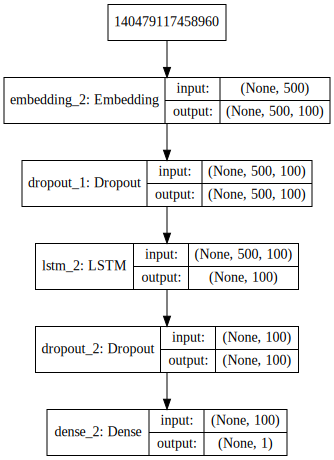

In [9]:
# Visualise the model another way
SVG(vis_utils.model_to_dot(
model2, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [10]:
history2 = model2.fit(x_train,y_train,epochs=6,batch_size=128,validation_data=(x_val, y_val),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 112s 5ms/step - loss: 0.4761 - acc: 0.7662 - val_loss: 0.3844 - val_acc: 0.8325
Epoch 2/6
23000/23000 [==============================] - 109s 5ms/step - loss: 0.2626 - acc: 0.8970 - val_loss: 0.3755 - val_acc: 0.8630
Epoch 3/6
23000/23000 [==============================] - 128s 6ms/step - loss: 0.1925 - acc: 0.9284 - val_loss: 0.3300 - val_acc: 0.8720
Epoch 4/6
23000/23000 [==============================] - 106s 5ms/step - loss: 0.1598 - acc: 0.9413 - val_loss: 0.3903 - val_acc: 0.8555
Epoch 5/6
23000/23000 [==============================] - 107s 5ms/step - loss: 0.1318 - acc: 0.9541 - val_loss: 0.4083 - val_acc: 0.8445
Epoch 6/6
23000/23000 [==============================] - 107s 5ms/step - loss: 0.1031 - acc: 0.9646 - val_loss: 0.4499 - val_acc: 0.8540


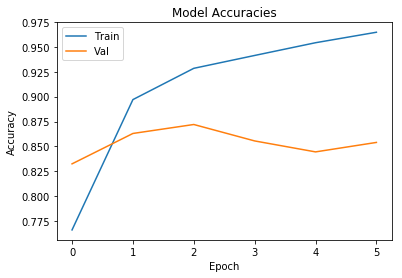

In [11]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()

In [14]:
results2 = model2.evaluate(test_data, test_labels)

25000/25000 [==============================] - 142s 6ms/step


In [ ]:
print('test_loss:', results2[0], 'test_accuracy:', results2[1])

The dropout layers help prevent overfitting by randomly setting some of the inputs to the next layer to 0 during training time. During testing time the dropout layers are not active and have no effect. We would therefore expect that this model will be more robust against overfitting, although we might expect a lower traiing accuracy. By adding more epochs to the training we allow the model to train futher but the dropout layers help prevent this from causing excessive overfitting. We can see from the graph that the gap between the trainign and validation curves is slightly smaller for model2 indicating less overfitting. We also see that validation accuracy peaks at 87.2% which is similar to the previous non-dropout model which peaked at: 87.5% validation accuracy. I'm suprised that the validation accuracy has not increased after adding the dropout layers but perhaps 87% is close to the maximum accuracy we can get using an LSTM and this data form with this preprocessing and perhaps the 1st model was lucky to get such a high accuracy. 

## Q8:Q2
Experiment with compiling the model with batch sizes of 1, 32, len(training_data). What do
you observe?

In [8]:
# Create LSTM based model
EMBED_SIZE = 100
model3 = Sequential()
model3.add(Embedding(VOCAB_SIZE, EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model3.add(Dropout(0.2))
model3.add(LSTM(100))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [16]:
history3 = model3.fit(x_train,y_train,epochs=3,batch_size=1,validation_data=(x_val, y_val),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
  260/23000 [..............................] - ETA: 3:25:22 - loss: 0.6914 - acc: 0.5308

KeyboardInterrupt: 

Using a batch size of 1 massively increases the time required to train the model. This is because the model is performing back propagation after calculating the error for each individual datapoint. This requires a lot more time to do. I interrupted the terminal as it was taking too long. 

In [9]:
history3 = model3.fit(x_train,y_train,epochs=3,batch_size=32,validation_data=(x_val, y_val),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 241s 10ms/step - loss: 0.4475 - acc: 0.7903 - val_loss: 0.3551 - val_acc: 0.8470
Epoch 2/3
23000/23000 [==============================] - 236s 10ms/step - loss: 0.2947 - acc: 0.8812 - val_loss: 0.3701 - val_acc: 0.8420
Epoch 3/3
23000/23000 [==============================] - 236s 10ms/step - loss: 0.2061 - acc: 0.9214 - val_loss: 0.3574 - val_acc: 0.8685


Using a batch_size of 32 is again longer than a batch size of 128 but will be using less memory on my laptop. We would expect it to perform similarly but should have a lower chance of getting stuck in a local minima, as the effect of a smaller batch will make its weight updates more erratic. This is because a smaller batch will be more affected by outliers than a larger one, where the averaging of the entire batch's errors will average away some of the effect of the outliers. As it is more erratic, it should hopefully get to a better minima. However it takes considerably more time as it performs more back propagations per epoch. 

In [18]:
history3 = model3.fit(x_train,y_train,epochs=3,batch_size=len(x_train),validation_data=(x_val, y_val),verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3


ResourceExhaustedError: OOM when allocating tensor with shape[23000,500,100] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node embedding_3/embedding_lookup}} = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@training_1/Adam/Assign_2"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](embedding_3/embeddings/read, embedding_3/Cast, training_1/Adam/gradients/embedding_3/embedding_lookup_grad/concat/axis)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node metrics_2/acc/Mean_1/_241}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_2061_metrics_2/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Using batch size len(training_data) causes an OOM error on my laptop (and probably most machines). It's not a sensible approach for most machines. It also could result in getting caught in a worse minima as only a single back propagation will happen per epoch. 